## Seaborn Tutorial

Seaborn is a data visualization library built on top of Matplotlib. It is often used because it makes attractive visualizations and works easily with Pandas. While in Matplotlib you often had to write multiple lines of code to create a plot Seaborn makes assumptions on what you want which often translates into getting the same plot with 1 line of code.

You can install it using the Anaconda Environment tab, or by executing the following in your terminal pip install seaborn or conda install seaborn.

Shift + Tab after attribute to see options

### import

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# to load graphs in notebook
%matplotlib inline

# Auto reloads notebook when changes are made
%reload_ext autoreload
%autoreload 2

### Import Data

In [3]:
# You can import your custom datasets from your pc using pandas
cs_df = pd.read_csv('ComputerSales.csv')
print(cs_df)

# Seaborn provides built in datasets
print(sns.get_dataset_names())

# let us load a built in dataset.. for example i'm taking titanic
cd_df = sns.load_dataset('titanic')
print(cd_df)

     Sale ID         Contact Gender  Age State     Product ID Product Type  \
0          1     Paul Thomas      M   43    OH      M01-F0024      Desktop   
1          2     Margo Simms      F   37    WV      GT13-0024      Desktop   
2          3       Sam Stine      M   26    PA          I3670      Desktop   
3          4      Moe Eggert      M   35    PA          I3593       Laptop   
4          5     Jessica Elk      F   55    PA         15M-ED       Laptop   
..       ...             ...    ...  ...   ...            ...          ...   
97        98  Michelle Samms      F   46    NY    17-BY3613DX       Laptop   
98        99    Mick Roberts      M   23    PA          BB980      Desktop   
99       100     Ed Klondike      M   52    OH   15M-ED0023DX       Laptop   
100      101      Moe Eggert      M   35    PA     GMA4000BST      Desktop   
101      102     Jessica Elk      F   55    PA  AN515-55-53AG       Tablet   

     Sale Price  Profit     Lead     Month  Year  
0        479

### Distribution Plots

### Distribution Plot

D:\keil drive\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

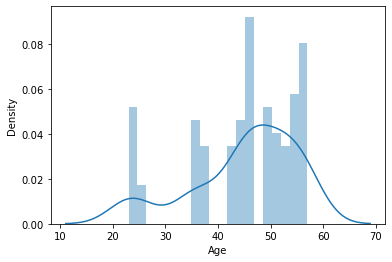

In [4]:
# It provides a way to look at a univariate distribution.

# A univeriate distribution provides a distribution for one variable

sns.distplot(cs_df['Age'], kde=True, bins = 20)

# kernel density estimation is a non-parametric way to estimate the
# probability density function of a random variable
# kde=False removes the KDE curve
# Bins define how many buckets to divide the data up into between intervals

### Joint Plot

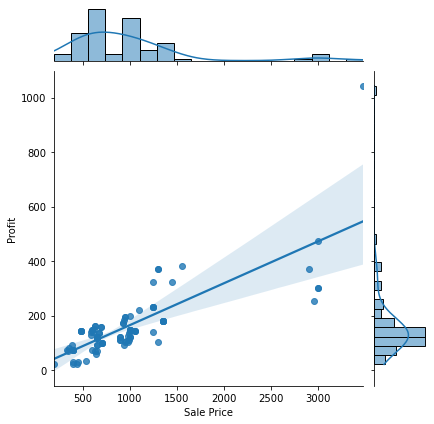

In [5]:
# Jointplot compares 2 distributions and plots a graph

sns.jointplot(x='Sale Price', y='Profit', data=cs_df, kind = 'reg')

# kind implements kind of plotting required
# default kind is scattering
# As we can see when sale price increases.. profit also increases
# here can create a regression line with kind='reg'
# You can create a 2D KDE with kind='kde'
# You can create a hexagon distribution with kind='hex'

### KDE Plot

<AxesSubplot:xlabel='Age', ylabel='Density'>

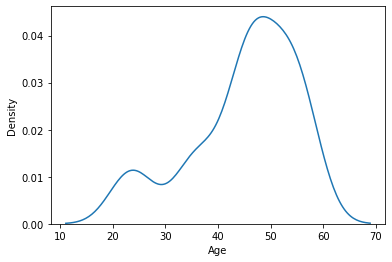

In [6]:
# used to get only KDE plot
sns.kdeplot(cs_df['Age'])

### Pair Plots

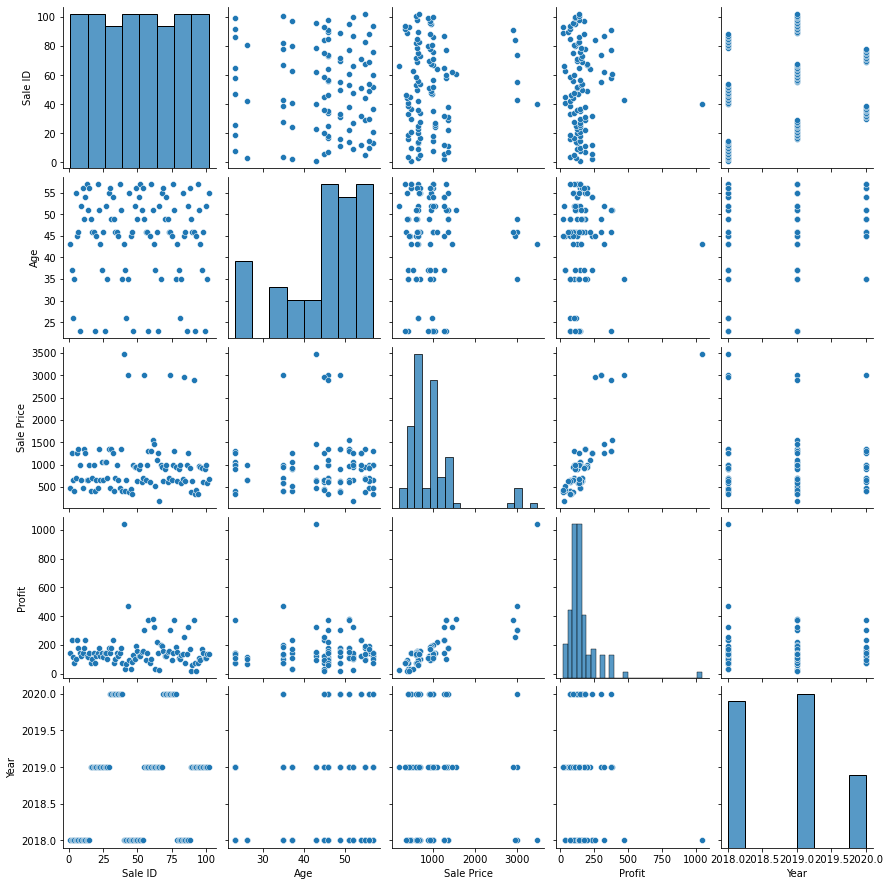

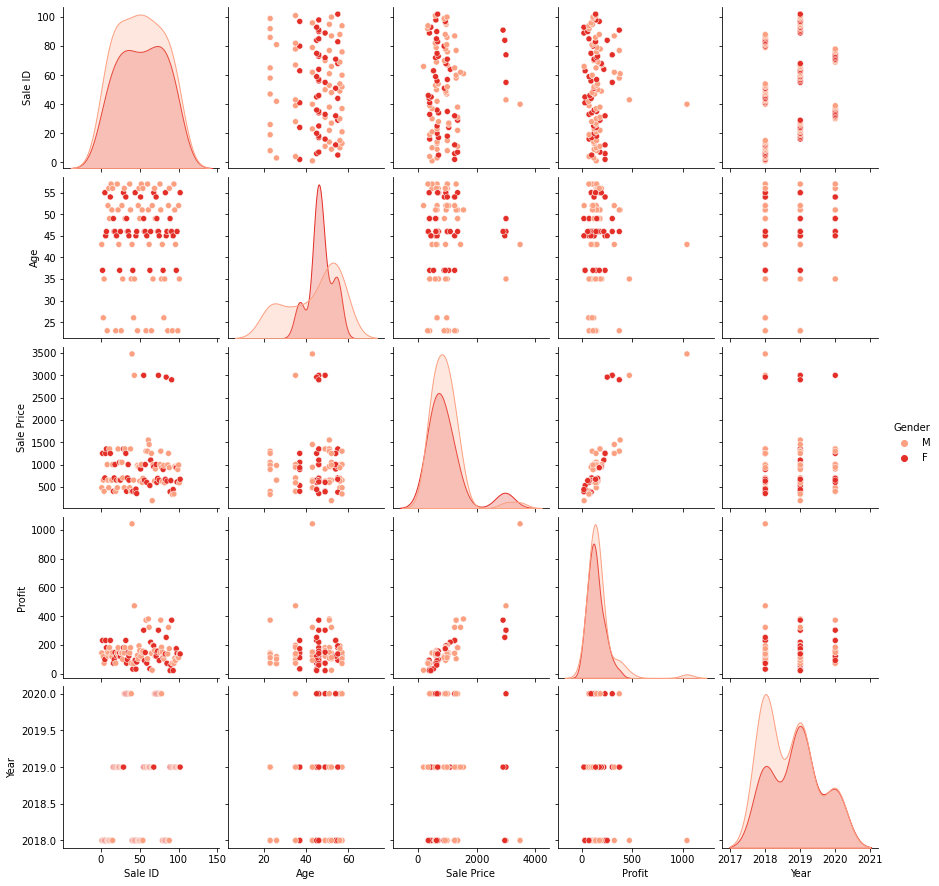

In [7]:
# Pair Plot plots relationships across the entire data frames numerical values

sns.pairplot(cs_df)


sns.pairplot(cs_df, hue='Gender', palette='Reds')

# With hue you can pass in a categorical column and the charts will be colorized
# here you can see male data is light red and female dark red
# You can use color maps from Matplotlib to define what colors to use

### Rug Plots

<AxesSubplot:xlabel='Sale Price'>

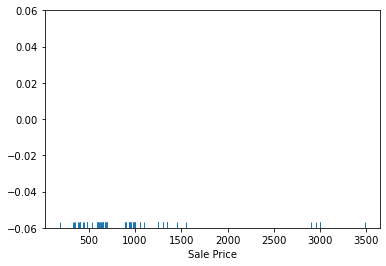

In [9]:
# Plots a single column of datapoints in an array as sticks on an axis

sns.rugplot(cs_df['Sale Price'])

# With a rug plot you'll see a more dense number of lines where the amount is 
# most common. This is like how a histogram is taller where values are more common

### Styling

<Figure size 576x288 with 0 Axes>

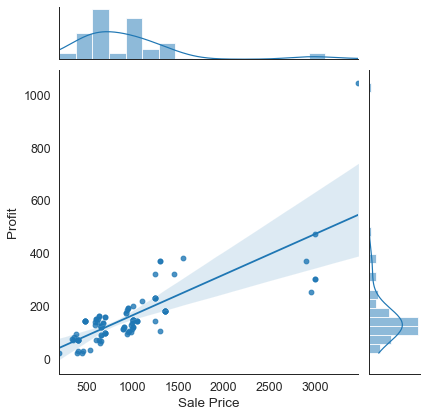

In [10]:
# You can set styling for your axes and grids
# there are 4 types of styling
# white, whitegrid,dark, darkgrid, ticks
sns.set_style('white')

# You can use figure sizing from Matplotlib
plt.figure(figsize=(8,4))

# Change size of lables, lines and other elements to best fit of the graph
# You can set how you present the data like in paper, notebook, talk and poster
sns.set_context('paper', font_scale=1.4)

sns.jointplot(x='Sale Price', y='Profit', data=cs_df, kind='reg')


# You can turn of specific spines with right=True, left=True
# bottom=True, top=True
sns.despine(left=False, bottom=False)

### Categorical Plots

### Bar Plots

<AxesSubplot:xlabel='Gender', ylabel='Profit'>

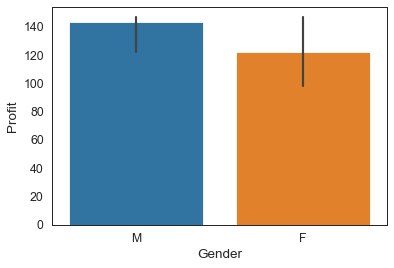

In [9]:
# Categorical Plots focus on distributions using categorical data in reference to one of the numerical columns

# It Aggregate categorical data based on a function.. at default it will be mean

sns.barplot(x='Gender',y='Profit',data=cs_df, estimator=np.median)

# this line estimate total profit based on Gender
# With estimator you can define functions to use other than the mean like here I have provided median
# You can use NumPy : median, standard deviation, variance, covariance or you can make your own functions


### Count Plot

<AxesSubplot:xlabel='Gender', ylabel='count'>

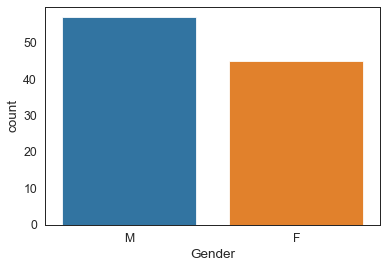

In [10]:
# A count plot is like a bar plot, but the estimator is counting the number of occurances

sns.countplot(x='Gender',data=cs_df)

### Box Plot

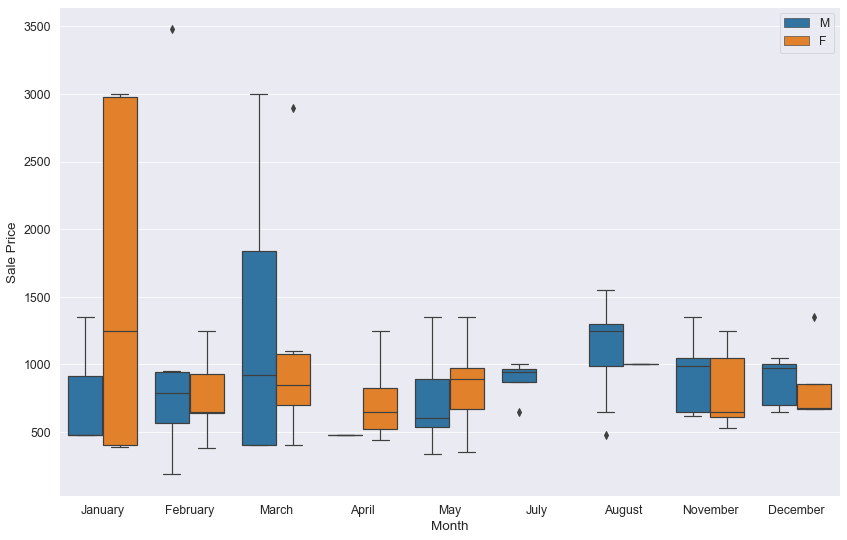

In [47]:
# A box plot allows you to compare different variables
# It the quartiles of the data. 

plt.figure(figsize=(14,9))
sns.set_style('darkgrid')
sns.boxplot(x='Month',y='Sale Price',data=cs_df, hue='Gender')

# The bar in the middle is the median and
# the box extends 1 standard deviation from the median
# The outer line extend to all the other data aside from the points that are considered to be outliers
# Hue can add another category, here i added Gender
# We see sale price of women is highest on january than other months


# we can move the legend with a location number (best: 0, 
# upper right: 1, upper left: 2, lower left: 3, lower right: 4,
# or supply a tuple of x & y from lower left

plt.legend(loc=0)

### Violin Plot

<AxesSubplot:xlabel='Month', ylabel='Profit'>

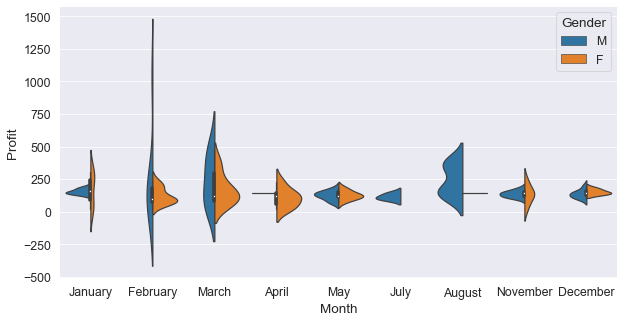

In [49]:
# Violin Plot is a combination of the boxplot and KDE
# While a box plot corresponds to data points, the violin plot uses the KDE estimation of the data points

plt.figure(figsize=(10,5))
sns.violinplot(x='Month',y='Profit',data=cs_df, hue='Gender',split=True)

# Split allows you to compare how the categories compare to each other

### Strip Plot

<AxesSubplot:xlabel='Month', ylabel='Profit'>

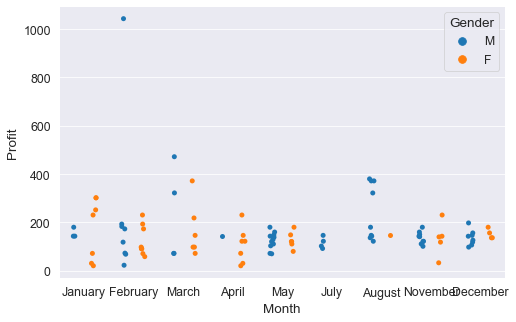

In [52]:
plt.figure(figsize=(8,5))

# The strip plot draws a scatter plot, representing all data points where one variable is categorical. 
# It is often used to show all observations with a box plot that represents the average distribution

sns.stripplot(x='Month',y='Profit',data=cs_df, jitter=True, hue='Gender', dodge=True)

# Jitter spreads data points out so that they aren't stacked on top of each other
# Hue breaks data into men and women
# Dodge separates the men and women data side by side

### Swarm Plot

<AxesSubplot:xlabel='Month', ylabel='Profit'>

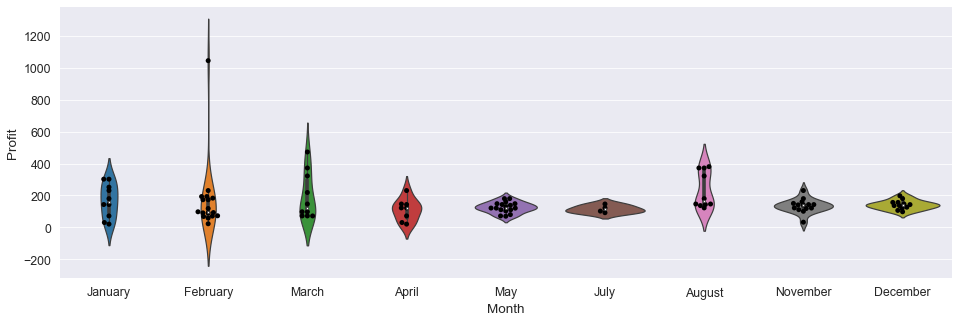

In [53]:
# A swarm plot is like a strip plot, but points are adjusted so they don't overlap

plt.figure(figsize=(16,5))
sns.swarmplot(x='Month',y='Profit',data=cs_df, color='black')

# It looks like a combination of the violin and strip plots

# You can stack a violin plot with a swarm

sns.violinplot(x='Month',y='Profit',data=cs_df)

### Palettes

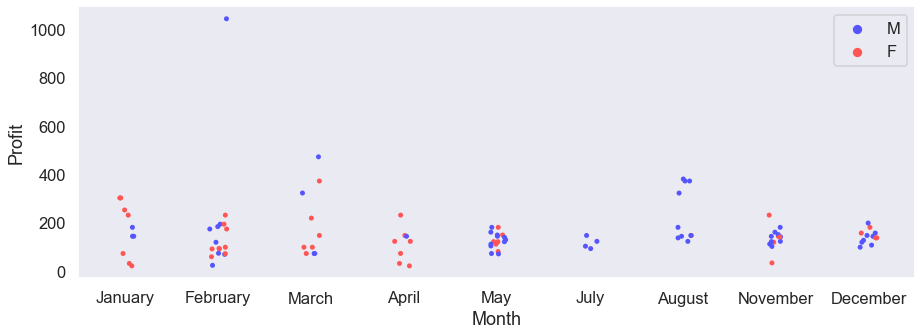

In [54]:
plt.figure(figsize=(15,5))

sns.set_style('dark')

sns.set_context('talk')

sns.stripplot(x='Month',y='Profit',data=cs_df, hue='Gender', palette='seismic')


plt.legend(loc=0)